In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
train_df = pd.read_csv('../data/train.csv')
oil_df = pd.read_csv('../data/oil.csv')
holidays_events_df = pd.read_csv('../data/holidays_events.csv')
stores_df = pd.read_csv('../data/stores.csv')
transactions_df = pd.read_csv('../data/transactions.csv')

In [26]:
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [27]:
oil_df

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [28]:
holidays_events_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [29]:
stores_df

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [30]:
transactions_df

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


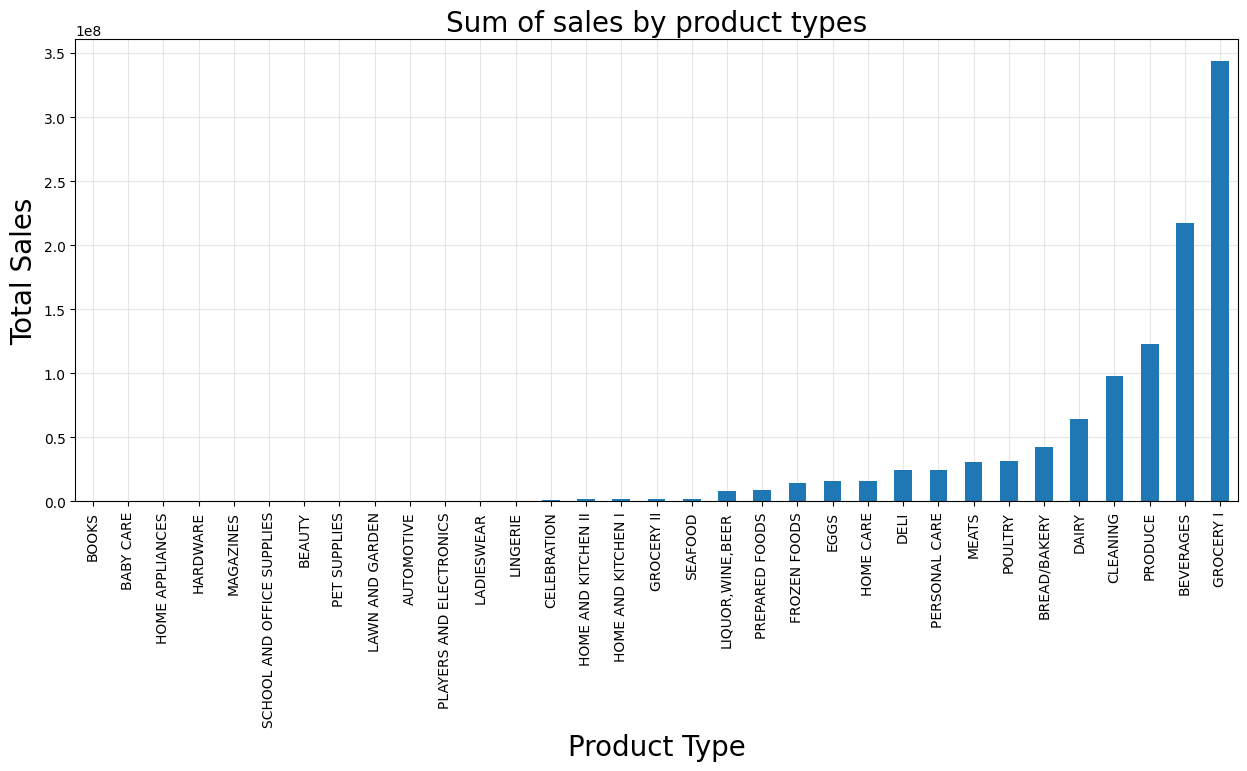

In [62]:
# Группировка данных по типам продуктов и суммирование продаж
sales_by_product_type = train_df.groupby('family')['sales'].sum()

# Сортировка данных по сумме продаж
sales_by_product_type_sorted = sales_by_product_type.sort_values()

# Построение графика с отсортированными данными
plt.figure(figsize=(15, 6))
sales_by_product_type_sorted.plot(kind='bar')
plt.gca().set_axisbelow(True)  # Помещаем сетку на задний план
plt.grid(alpha=0.3)  # Добавляем сетку с прозрачностью
plt.title('Sum of sales by product types', fontsize=20)
plt.xlabel('Product Type', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show()


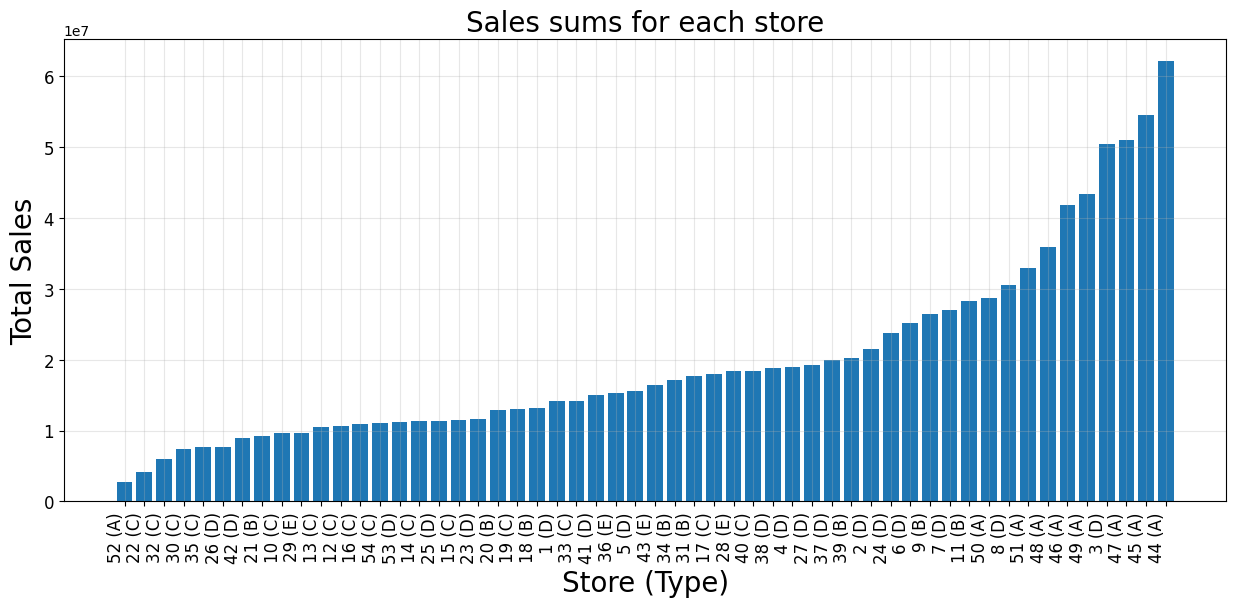

In [61]:
# Создание списка меток оси x с номером магазина и его типом
store_labels = [f"{store_nbr} ({store_type})" for store_nbr, store_type in zip(stores_df['store_nbr'], stores_df['type'])]

# Создание DataFrame с магазинами и их типами
store_data = pd.DataFrame({'Store': store_labels, 'Sales': sales_by_store_named.values})

# Сортировка магазинов по сумме продаж
store_data_sorted = store_data.sort_values(by='Sales')

# Построение графика с отсортированными магазинами по типам
plt.figure(figsize=(15, 6))
plt.bar(range(len(store_data_sorted)), store_data_sorted['Sales'], width=0.8)  # Увеличиваем отступ между столбцами
plt.xticks(range(len(store_data_sorted)), store_data_sorted['Store'], rotation=90, ha='right', fontsize=12)
plt.grid(alpha=0.3)
plt.title('Sales sums for each store', fontsize=20)
plt.xlabel('Store (Type)', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.yticks(fontsize=12)
plt.show()


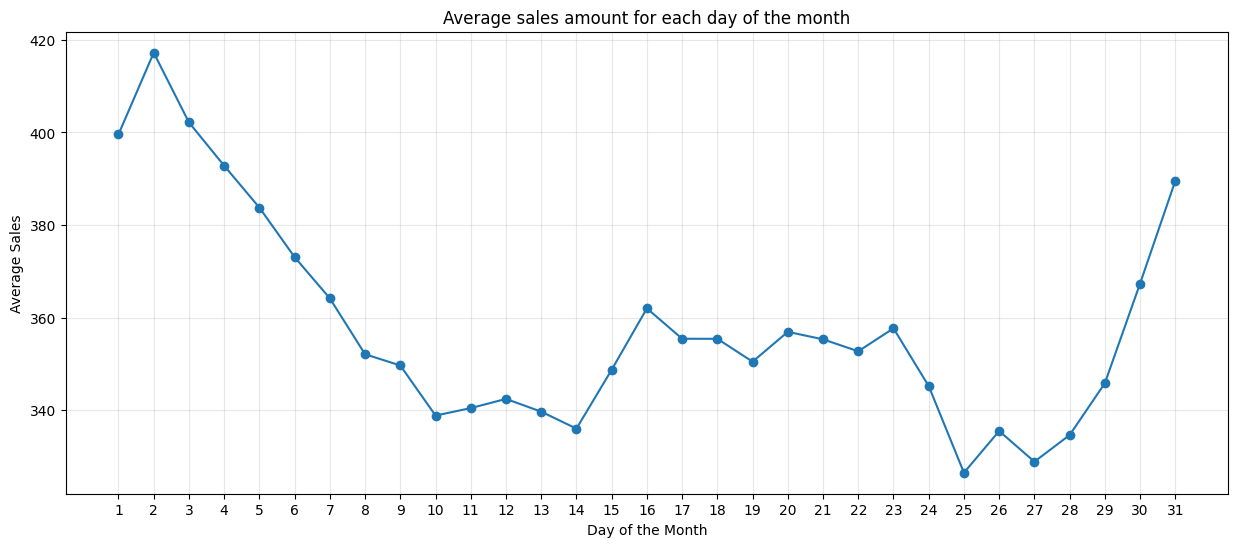

In [41]:
# Построение графика с использованием plt.plot()
plt.figure(figsize=(15, 6))
plt.plot(average_sales_by_day.index, average_sales_by_day.values, marker='o')  # Указываем точки
plt.gca().set_axisbelow(True)  # Помещаем сетку на задний план
plt.grid(alpha=0.3)  # Добавляем сетку с прозрачностью
plt.title('Average sales amount for each day of the month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Sales')
plt.xticks(average_sales_by_day.index)  # Устанавливаем значения оси x
plt.show()

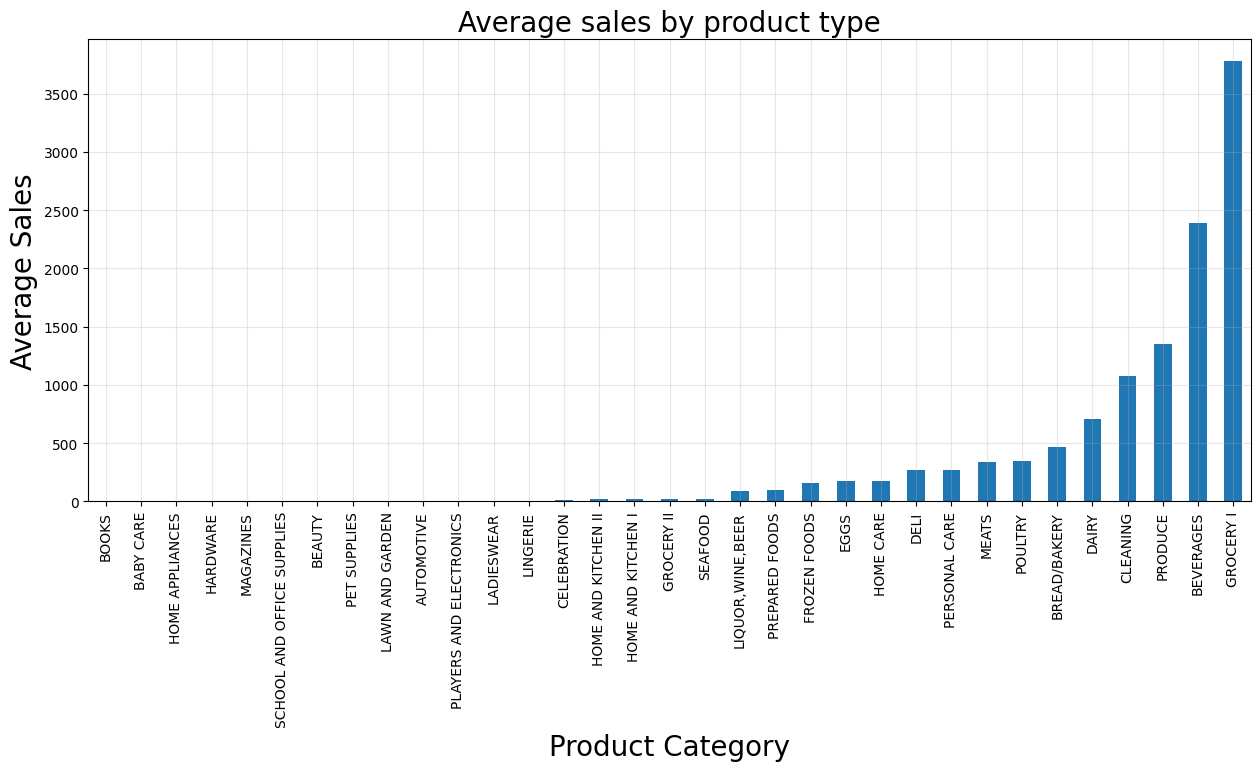

In [66]:
# Группировка данных по типам продуктов и вычисление среднего объема продаж
average_sales_by_category = train_df.groupby('family')['sales'].mean()

# Сортировка данных по среднему объему продаж
average_sales_by_category_sorted = average_sales_by_category.sort_values()

# Построение графика с отсортированными данными
plt.figure(figsize=(15, 6))
average_sales_by_category_sorted.plot(kind='bar')
plt.grid(alpha=0.3)
plt.title('Average sales by product type', fontsize=20)
plt.xlabel('Product Category', fontsize=20)
plt.ylabel('Average Sales', fontsize=20)
plt.show()


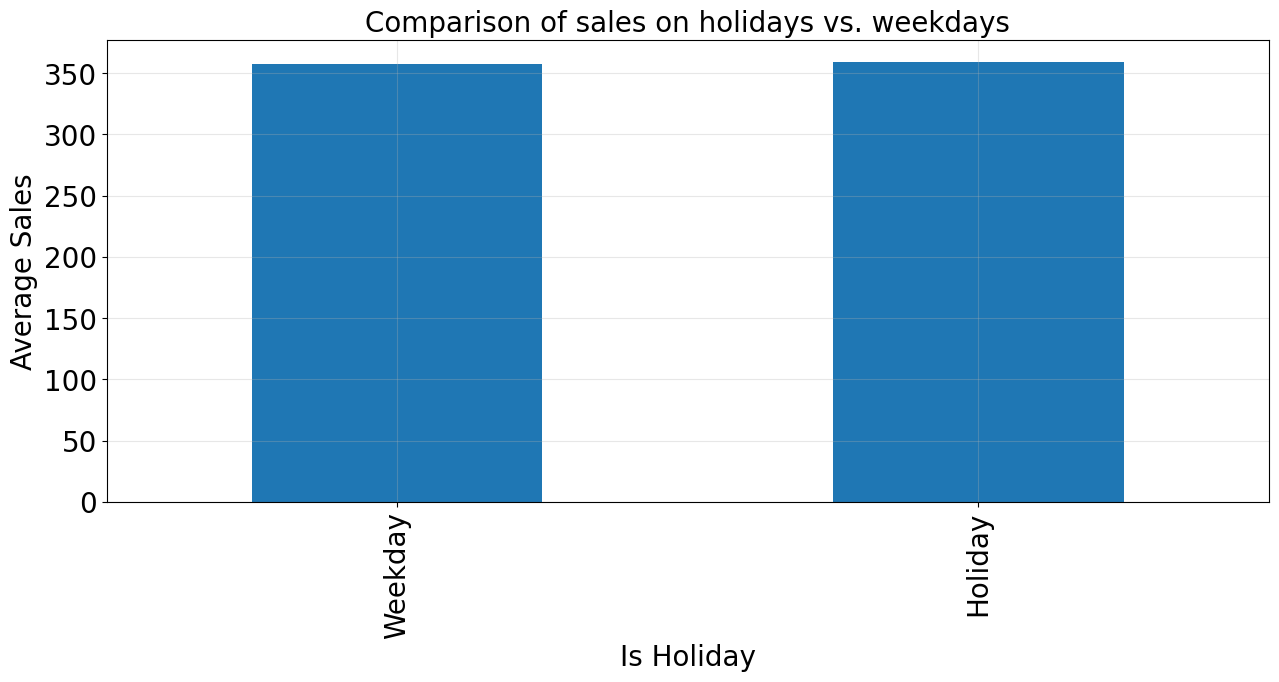

In [69]:
# Приведение данных столбца 'date' к типу datetime64[ns]
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])

# Фильтрация данных по праздникам и рабочим дням
is_holiday = train_df['date'].isin(holidays_events_df[(holidays_events_df['type'] == 'Holiday') & (holidays_events_df['transferred'] == False)]['date'])

# Группировка данных по типу дня и вычисление среднего объема продаж
sales_comparison = train_df.groupby(is_holiday)['sales'].mean()

# Построение графика
plt.figure(figsize=(15, 6))
sales_comparison.plot(kind='bar')
plt.grid(alpha=0.3)
plt.title('Comparison of sales on holidays vs. weekdays', fontsize=20)
plt.xlabel('Is Holiday', fontsize=20)
plt.ylabel('Average Sales', fontsize=20)
plt.xticks([0, 1], ['Weekday', 'Holiday'], fontsize=20)
plt.yticks(fontsize=20)
plt.show()
